We discussed the basics of Artificial Neural Networks (ANNs) in the last two notebooks and implemented a simple version of an ANN ourselves. In practice, there are many packages that do this for us. In this notebook, we will build a Multiplayer Perceptron (MLP) classifier from the amazing [scikit-learn](http://scikit-learn.org/stable/) package. Feel free to check out their introduction and implementation of [ANNs](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).   

We will work on the famous [Handwritten Digits Data Sets](http://scikit-learn.org/stable/datasets/#optical-recognition-of-handwritten-digits-data-set) to classify the digits using a MLP. 

To motivate our work, consider when you deposit a check at the ATM or by taking a photo on your camera. An algorithm similar to what we will cover today is under working under the hood to classify the amount on the check and translate this digital data to store in your bank account!

<img src="https://www.usglobalmail.com/wp-content/uploads/2016/12/check-deposits.png" width="600" />

We will show the basic workflow of using the MLP classifier in sklearn, and hope you can use this in your own research!

In [82]:
# import all the needed modules
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
plt.style.use('seaborn-poster')
%matplotlib inline

## Load and visualize data 

Let's load the [Handwritten Digits Data Set](http://scikit-learn.org/stable/datasets/#optical-recognition-of-handwritten-digits-data-set) from sklearn. The data set contains images of handwritten digits with 10 classes where each class refers to a digit from 0 to 9. We can download this data from sklearn, so let's load the data!

In [83]:
# load data
digits = load_digits()
print('We have %d samples'%len(digits.target))

We have 1797 samples


In [84]:
# let's look the classes we have
print(np.unique(digits.target))

[0 1 2 3 4 5 6 7 8 9]


In [85]:
# let's look at one sample data, it is 64 features (8*8)
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Each datapoint is an array, respresenting an 8x8 grid of pixels and their values (darkness). 

We will plot the first 64 samples below to get a sense what we are working with with. Each image shows the handwritten digit and the correct digit class (target) on the left bottom corner.   

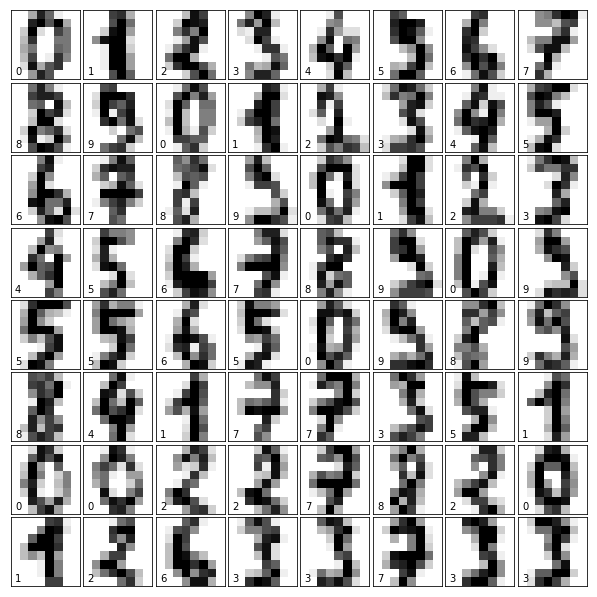

In [86]:
## plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

## Training and Testing the ANN classifier  

We will split our dataset into two parts, 80% for training and 20% testing. The training data will be used to update the parameters (train) our model. The testing set will be used to see how well our model generalizes to to unseen data (test our model). 

We then will build an ANN model using the default parameter settings in sklearn, and train it using the training data. 

In [87]:
# split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)
print('Number of samples in training set: %d, number of samples in test set: %d'%(len(y_train), len(y_test)))

Number of samples in training set: 1437, number of samples in test set: 360


The next step is [pre-processing](http://scikit-learn.org/stable/modules/preprocessing.html) the data. Pre-processing refers to the transformations we apply to our data **before** feeding it into our model. We will use the [StandardScaler in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to transform our data to have a mean of 0 and scaled to the standard deviation.

Each datapoint is transformed as follows:

$z = \frac{x - u}{a}$

Where:

z = the transformed data point    
x = the original data point     
u = the mean of the entire dataset    
a = the standard deviation of the dataset

For those coming from statistics, this is the z-score of the datapoints.

In [88]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

The following code block is to train the MLP classifier. We will mostly use the default setting, and you can find more details information of the options [here](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). 

In [89]:
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), 
                    activation='logistic', 
                    max_iter = 1000,
                    random_state=1)

# Train the classifier with the traning data
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

I will explain the options usually you need change or know briefly here:  
* hidden_layer_sizes - a tuple to determine the number of neurons in each hidden layer (3 hidden layers with 30 neurons each in this example)
* activation - defines the activation functions.   
* alpha - a parameter to control the strength of [regularization][1] which help avoiding overfitting by penalizing the size of the weights.  
* solver - the algorithm for weight optimization. 
* batch_size - size of minibatches for stochastic optimizers. The minibatch is the number of datapoints to use in each [online learning] (https://en.wikipedia.org/wiki/Online_machine_learning) cycle.   
* learning_rate - option to use different learning rate for weight updates. You can use constant learning rate, or changing the learning rate with progress.   
* max_iter - maximum number of iterations. This will decide when to stop the solver, either the solver converges (determined by 'tol') or this maximum number of iterations.  
* tol - tolerance for the optimization.  
* momentum - momentum for gradient descent updates. This will try to avoid trap the local minimum.
* random_state - determines random number generation for weights and bias initialization (for reproducibility)

[1]: https://en.wikipedia.org/wiki/Regularization_(mathematics)

## Test ANN classifier and evaluate  

After we trained the ANN classifier, we will test the performance of the classifier using the test data. To evaluate the results, we will plot the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

In [90]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(8, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

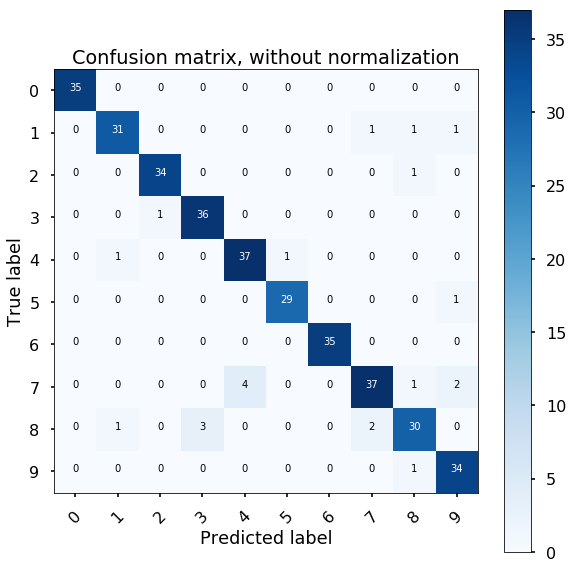

In [91]:
# predict results from the test data
predicted = mlp.predict(X_test_scaled)

# plot the confusion matrix
cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm, classes=digits.target_names,
                      title='Confusion matrix, without normalization')

The x axis is the predicted digit from our MLP model, and the y axis is the true digit. The diagonal represents the correct results, we can see most of the digits we can estimate correctly. 

We can see the one of the most common errors is predicting a 4 when the true target is 7. A reasonable error I also make with my brain!

### Accuracy
Let's get the accuracy of our model, which is defined as the proportion of correct classification over the total.

In [92]:
def model_accuracy(pred, target):
    """
    Returns the accuracy of our model, the proportion of correct classifications relative to all datapoints.
    """
    n = len(target)
    # Compares our predicted and target arrays returning 1 if true and 0 if false
    comparison = pred == target
    # Sums the array giving us the number of correct predictions
    correct = comparison.sum()
    
    # Returns the number of correct classifications proportional to the number of datapoints
    return round(correct/n, 2)
    
print("Accuracy = ", model_accuracy(predicted, y_test))

Accuracy =  0.94


Not bad! Our model has an accuracy of 94% !

## Visualize the test results  

Let's visualize the first 64 digits in the test data. The green or the red digits at the left bottom corner are our estimation from the MLP model. Green text means we correctly classified the data, and while the red indicates the model gave the wrong prediction. 

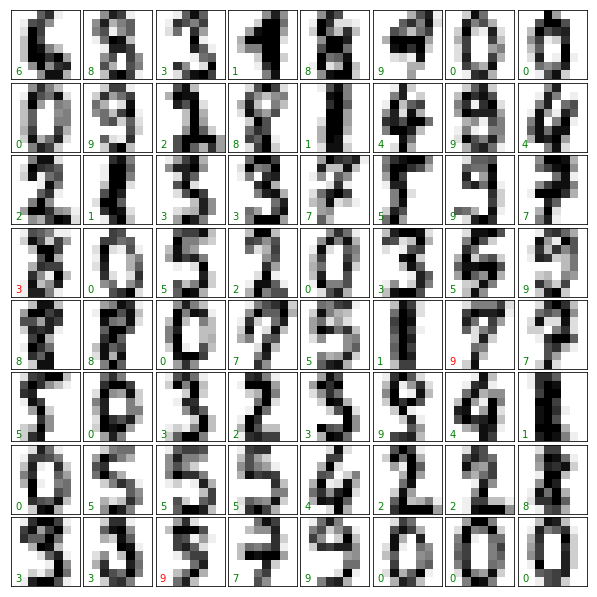

In [93]:
expected = y_test 
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

As you can see, our model performed quite well! With 94% accuracy on the training data. If we take a look at what the model got wrong, we may feel a bit bad. Looking at the incorrectly classified datapoint, I can't help but feel some sympathy for our model, let's take a closer look at this image incorrectly classified as a 9.

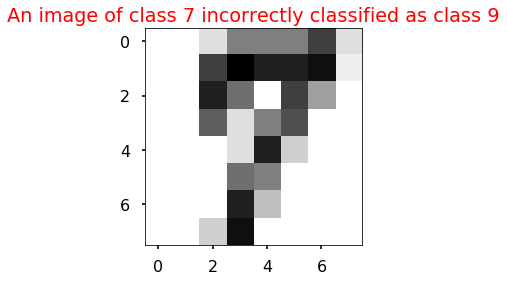

In [99]:
wrong_target_index = 38

plt.imshow(X_test.reshape(-1, 8, 8)[wrong_target_index], cmap=plt.cm.binary, interpolation='nearest');
plt.title(f"An image of class {y_test[wrong_target_index]} incorrectly classified as class {predicted[wrong_target_index]}", color="red");

At a quick glance (with my human eyes), it would be hard to tell if this was a 7 or 9. 

Remember, our predictions are only as good as the features in the data we put in!